In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_CONTAINER = "data/"

In [2]:
# loading data
def load_csv_data(file_name, data_container=DATA_CONTAINER):
    csv_path = os.path.join(data_container, file_name)
    return pd.read_csv(csv_path)

In [3]:
def plot_boxplox(data_time, data_temp, labels, title):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    bp = ax1.boxplot(data_time, labels=labels, notch=True, bootstrap=10000)
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='b')
    
    ax2 = ax2.twinx()
    bp = ax2.boxplot(data_temp, labels=labels, notch=True, bootstrap=10000)
    ax2.set_ylabel('temperature (°C)', color='r', )
    ax2.tick_params('y', colors='r')
  
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='r')
        
    plt.show()

In [12]:
def plot_data(timestamp, time, temp, limits, title):
    fig, ax1 = plt.subplots()

    maxtime = timestamp[-1:]

    ymin1 = limits[0]
    ymax1 = limits[1]
    ax1.plot(timestamp, time, 'b-')
    ax1.set_xlabel('experiment time (min) - (duration: %.2f min)' %(maxtime))
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim([ymin1, ymax1])

    ymin2 = limits[2]
    ymax2 = limits[3]
    ax2 = ax1.twinx()
    ax2.plot(timestamp, temp, 'r')
    ax2.set_ylabel('temperature (°C)', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_ylim([ymin2, ymax2])
    
    ax1.set_title(title)

    plt.show()

In [5]:
def plot_barh(y_pos, performance, error, labels, title, color, xlabel):
    fig, ax = plt.subplots()
    plt.grid()
    # Example data
    people = labels

    ax.barh(y_pos, performance, xerr=error, align='center',  color=color, ecolor='black', height=0.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()


**Standard Raspbian Kernel**

In [8]:
# rPi 4B - loading data standard raspbian kernel multi-thread and single-thread solution 
path_4b = "data/performance/raspberry_pi/buster/4B"

kernel_std_4b_mt = load_csv_data("std_kernel_4B_multithread_output.csv", path_4b)
kernel_std_4b_mt['time'] -= kernel_std_4b_mt['time'][0]

kernel_std_4b_st = load_csv_data("std_kernel_4B_singlethread_output.csv", path_4b)
kernel_std_4b_st['time'] -= kernel_std_4b_st['time'][0]


In [9]:
# rPi 3B+ - loading data standard raspbian kernel multi-thread and single-thread solution 
path_3b_p = "data/performance/raspberry_pi/buster/3B+"

kernel_std_3b_p_mt = load_csv_data("std_kernel_3B+_multithread_output.csv", path_3b_p)
kernel_std_3b_p_mt['time'] -= kernel_std_3b_p_mt['time'][0]

kernel_std_3b_p_st = load_csv_data("std_kernel_3B+_singlethread_output.csv", path_3b_p)
kernel_std_3b_p_st['time'] -= kernel_std_3b_p_st['time'][0]

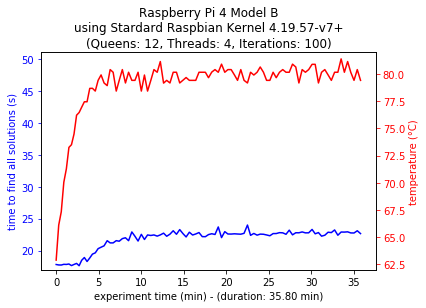

In [13]:
# rPi 4B - plotting standard raspbian kernel with multi-thread solution
timestamp_std_4b_mt = kernel_std_4b_mt.time/60
time_std_4b_mt = kernel_std_4b_mt.seconds + kernel_std_4b_mt.microseconds/1000000
temp_std_4b_mt = (kernel_std_4b_mt.cpu_temp + kernel_std_4b_mt.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.57-v7+\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_std_4b_mt[:99], time_std_4b_mt[:99], temp_std_4b_mt[:99], (17, 51, 62, 82), title)

In [14]:
print("Time to 45 iterations: %.2f" %timestamp_std_4b_mt[44])

Time to 45 iterations: 15.28


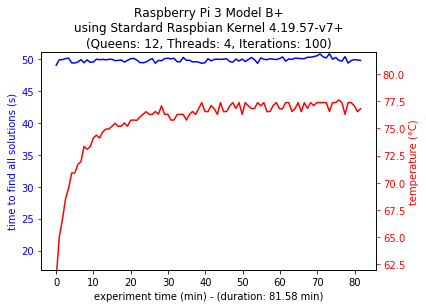

In [15]:
# rPi 3B+ - plotting standard raspbian kernel with multi-thread solution
timestamp_std_3b_p_mt = (kernel_std_3b_p_mt.time)/60
time_std_3b_p_mt = kernel_std_3b_p_mt.seconds + kernel_std_3b_p_mt.microseconds/1000000
temp_std_3b_p_mt = (kernel_std_3b_p_mt.cpu_temp + kernel_std_3b_p_mt.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Stardard Raspbian Kernel 4.19.57-v7+\n(Queens: 12, Threads: 4, Iterations: 100)"
plot_data(timestamp_std_3b_p_mt[:99], time_std_3b_p_mt[:99], temp_std_3b_p_mt[:99], (17, 51, 62, 82), title)

In [45]:
print("Time to 45 iterations: %.2f" %timestamp_std_3b_p_mt[44])

Time to 45 iterations: 36.57


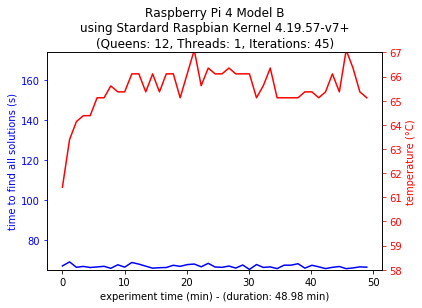

In [16]:
# rPi 4B - plotting standard raspbian kernel with single-thread solution

timestamp_std_4b_st = kernel_std_4b_st.time/60
time_std_4b_st = kernel_std_4b_st.seconds + kernel_std_4b_st.microseconds/1000000
temp_std_4b_st = (kernel_std_4b_st.cpu_temp + kernel_std_4b_st.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.57-v7+\n(Queens: 12, Threads: 1, Iterations: 45)"
plot_data(timestamp_std_4b_st[:45], time_std_4b_st[:45], temp_std_4b_st[:45], (65, 174, 58, 67), title)

In [17]:
print("Time to 45 iterations: %.2f" %timestamp_std_4b_st[44])

Time to 45 iterations: 48.98


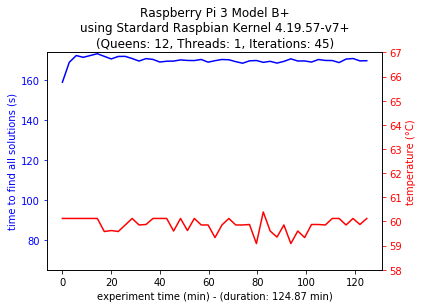

In [19]:
# rPi 3B+ - plotting standard raspbian kernel with single-thread solution

timestamp_std_3b_p_st = kernel_std_3b_p_st.time/60
time_std_3b_p_st = kernel_std_3b_p_st.seconds + kernel_std_3b_p_st.microseconds/1000000
temp_std_3b_p_st = (kernel_std_3b_p_st.cpu_temp + kernel_std_3b_p_st.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Stardard Raspbian Kernel 4.19.57-v7+\n(Queens: 12, Threads: 1, Iterations: 45)"
plot_data(timestamp_std_3b_p_st[:45], time_std_3b_p_st[:45], temp_std_3b_p_st[:45], (65, 174, 58, 67), title)

In [50]:
print("Time to 45 iterations: %.2f" %timestamp_std_3b_p_st[44])

Time to 45 iterations: 124.87


In [51]:
# multi-thread vs single-thread
mt_timing_std_4b = (time_std_4b_st[:44,None]/time_std_4b_mt[:44,None])
mt_timing_std_3b_p = time_std_3b_p_st[:44]/time_std_3b_p_mt[:44] 

print("Multi-thread 4B: %.2f | Multi-thread 3B+: %.2f" % (np.mean(mt_timing_std_4b), np.mean(mt_timing_std_3b_p)))
print("Multi-thread 4B: %.2f | Multi-thread 3B+: %.2f" % (np.mean(time_std_4b_mt), np.mean(time_std_3b_p_mt)))

Multi-thread 4B: 3.27 | Multi-thread 3B+: 3.42
Multi-thread 4B: 21.79 | Multi-thread 3B+: 49.83


In [52]:
# model 4B vs B+ single- multi-thread
mt_timing_std_4b_vs_3b_p = time_std_3b_p_mt[:99]/time_std_4b_mt[:99]
st_timing_std_4b_vs_3b_p = time_std_3b_p_st[:44]/time_std_4b_st[:44]

print("Multi-thread: %.2f | Single-thread B: %.2f" % (np.mean(mt_timing_std_4b_vs_3b_p), np.mean(st_timing_std_4b_vs_3b_p)))
print("Multi-thread B+: %.2f | Multi-thread B: %.2f" % (np.mean(time_std_4b_st), np.mean(time_std_3b_p_st)))

Multi-thread: 2.30 | Single-thread B: 2.55
Multi-thread B+: 66.72 | Multi-thread B: 169.96


In [53]:
max_std_mt_4b_temp = np.max(temp_std_4b_mt)
max_std_mt_3b_p_temp = np.max(temp_std_3b_p_mt)

max_std_st_4b_temp = np.max(temp_std_4b_st)
max_std_st_3b_p_temp = np.max(temp_std_3b_p_st)

print("Max. temp. %.2f | Max. temp. %.2f" % (max_std_mt_4b_temp, max_std_mt_3b_p_temp))
print("Max. temp. %.2f | Max. temp. %.2f" % (max_std_st_4b_temp, max_std_st_3b_p_temp))

Max. temp. 81.40 | Max. temp. 77.63
Max. temp. 67.09 | Max. temp. 60.39
